# Task-1: Polynomial regression
Task Design:

Dataset:
bluegills.txt with fields age and length.

Questions:
1. Load the dataset and perform preprocessing (Normalization & Standardization).

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
url = "https://raw.githubusercontent.com/goutam922/SML-lab-new/refs/heads/main/bluegills.csv"
df = pd.read_csv(url, sep='\t')
X = df[['age']].values
y = df['length'].values
scaler_norm = MinMaxScaler()
X_normalized = scaler_norm.fit_transform(X)
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)
print("Original Data:")
print(df.head())
print("\nNormalized Data (first 5 rows of 'age'):")
print(X_normalized[:5])
print("\nStandardized Data (first 5 rows of 'age'):")
print(X_standardized[:5])

Original Data:
   age  length
0    1      67
1    1      62
2    2     109
3    2      83
4    2      91

Normalized Data (first 5 rows of 'age'):
[[0. ]
 [0. ]
 [0.2]
 [0.2]
 [0.2]]

Standardized Data (first 5 rows of 'age'):
[[-2.85245432]
 [-2.85245432]
 [-1.76713024]
 [-1.76713024]
 [-1.76713024]]


2. Divide the dataset into training and testing data with 80:20 ratio.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (62, 1) (62,)
Testing data shape (X_test, y_test): (16, 1) (16,)


3. Perform Polynomial Regression and fit models for polynomial degrees 1 to 5.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
train_errors = []
test_errors = []
r2_scores = []
degrees = range(1, 6)
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    r2 = r2_score(y_test, y_test_pred)
    r2_scores.append(r2)
    print(f"Degree {degree}:")
    print(f"  Training RMS Error: {train_rmse:.2f}")
    print(f"  Testing RMS Error: {test_rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}\n")

Degree 1:
  Training RMS Error: 11.78
  Testing RMS Error: 14.45
  R2 Score: 0.72

Degree 2:
  Training RMS Error: 10.35
  Testing RMS Error: 12.03
  R2 Score: 0.81

Degree 3:
  Training RMS Error: 10.34
  Testing RMS Error: 12.09
  R2 Score: 0.80

Degree 4:
  Training RMS Error: 10.33
  Testing RMS Error: 12.26
  R2 Score: 0.80

Degree 5:
  Training RMS Error: 10.24
  Testing RMS Error: 12.37
  R2 Score: 0.80



4. Plot training error and test error (RMS error) versus polynomial degree.

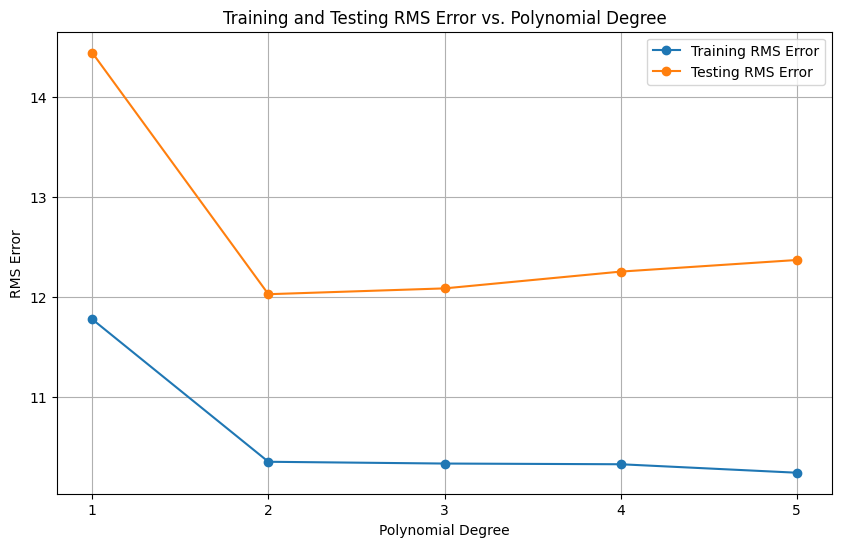

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', label='Training RMS Error')
plt.plot(degrees, test_errors, marker='o', label='Testing RMS Error')
plt.title('Training and Testing RMS Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

5. Measure the relationship between age and length using R² score

In [30]:
print("R2 Scores for each polynomial degree:")
for degree, r2 in zip(degrees, r2_scores):
    print(f"Degree {degree}: {r2:.2f}")

R2 Scores for each polynomial degree:
Degree 1: 0.72
Degree 2: 0.81
Degree 3: 0.80
Degree 4: 0.80
Degree 5: 0.80


6. Using the best polynomial degree (the one with lowest test RMS error), predict the length of a bluegill at age 5 and compare it with the actual dataset values.

In [31]:
best_degree_index = np.argmin(test_errors)
best_degree = degrees[best_degree_index]
print(f"Best polynomial degree based on lowest test RMS error: {best_degree}")
poly_features_best = PolynomialFeatures(degree=best_degree)
X_train_poly_best = poly_features_best.fit_transform(X_train)
X_test_poly_best = poly_features_best.transform(X_test)
model_best = LinearRegression()
model_best.fit(X_train_poly_best, y_train)
age_5 = np.array([[5]])
age_5_poly = poly_features_best.transform(age_5)
predicted_length_at_5 = model_best.predict(age_5_poly)
print(f"\nPredicted length of a bluegill at age 5 using degree {best_degree} polynomial: {predicted_length_at_5[0]:.2f}")
actual_lengths_at_5 = df[df['age'] == 5]['length'].values
print("\nActual lengths of bluegills at age 5 in the dataset:")
if len(actual_lengths_at_5) > 0:
    for length in actual_lengths_at_5:
        print(length)
    print(f"Average actual length at age 5: {np.mean(actual_lengths_at_5):.2f}")
else:
    print("No bluegills found at age 5 in the dataset.")

Best polynomial degree based on lowest test RMS error: 2

Predicted length of a bluegill at age 5 using degree 2 polynomial: 167.42

Actual lengths of bluegills at age 5 in the dataset:
171
188
170
150
150
160
160
180
Average actual length at age 5: 166.12


# Task-2: Polynomial regression
Q1. Load the dataset (nifty energy.csv) and perform preprocessing (normalization/standardization if required).

In [32]:
import pandas as pd
url = "https://raw.githubusercontent.com/goutam922/SML-lab-new/refs/heads/main/NIFTY%20ENERGY.csv"
df_nifty = pd.read_csv(url)
display(df_nifty.head())
df_nifty.info()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-Aug-23,25972.70,26014.15,25648.35,25722.95,235663367.0,8078.37
1,1-Sep-23,25728.20,26356.75,25678.05,26332.90,178647817.0,6317.92
2,4-Sep-23,26511.25,26708.90,26332.90,26633.05,210279678.0,6454.45
3,5-Sep-23,26737.80,26793.10,26590.40,26743.00,144559789.0,4738.61
4,6-Sep-23,26803.25,26860.00,26571.05,26819.90,314482269.0,9662.06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    247 non-null    float64
 6   Turnover (₹ Cr)  247 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [33]:
print(df_nifty.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')


In [34]:
print("Missing values before handling:")
print(df_nifty.isnull().sum())
df_nifty['Shares Traded '] = df_nifty['Shares Traded '].fillna(df_nifty['Shares Traded '].mean())
df_nifty['Turnover (₹ Cr)'] = df_nifty['Turnover (₹ Cr)'].fillna(df_nifty['Turnover (₹ Cr)'].mean())
print("\nMissing values after handling:")
print(df_nifty.isnull().sum())
df_nifty['Close'] = pd.to_numeric(df_nifty['Close'], errors='coerce')
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'], format='%d-%b-%y')
print("\nDataFrame info after preprocessing:")
df_nifty.info()

Missing values before handling:
Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64

Missing values after handling:
Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

DataFrame info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             248 non-null    datetime64[ns]
 1   Open             248 non-null    float64       
 2   High             248 non-null    float64       
 3   Low              248 non-null    float64       
 4   Close            248 non-null    float64       
 5   Shares Traded    248 non-null    float64       
 6   Turnover (₹ Cr)  248 non-null    float64      

In [35]:
X = df_nifty['Date'].values.reshape(-1, 1)
y = df_nifty['Close'].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X[:5])
print("\nFirst 5 rows of y:")
print(y[:5])

Shape of X: (248, 1)
Shape of y: (248,)

First 5 rows of X:
[['2023-08-31T00:00:00.000000000']
 ['2023-09-01T00:00:00.000000000']
 ['2023-09-04T00:00:00.000000000']
 ['2023-09-05T00:00:00.000000000']
 ['2023-09-06T00:00:00.000000000']]

First 5 rows of y:
[25722.95 26332.9  26633.05 26743.   26819.9 ]


Q2. Fit different regression models (Linear Regression, Polynomial Regression with degree 1–5). Compute and compare R² scores for each model to decide which fits best.

In [36]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_models = []
for degree in range(1, 6):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    poly_models.append(model)
    print(f"Trained Polynomial Regression model for degree {degree}")
print("\nAll polynomial models trained successfully.")

Trained Polynomial Regression model for degree 1
Trained Polynomial Regression model for degree 2
Trained Polynomial Regression model for degree 3
Trained Polynomial Regression model for degree 4
Trained Polynomial Regression model for degree 5

All polynomial models trained successfully.


In [38]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
X_numeric = np.array([d.toordinal() for d in df_nifty['Date']]).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(X_numeric, y)
y_pred_linear = linear_model.predict(X_numeric)
r2_linear = r2_score(y, y_pred_linear)
r2_poly = []
poly_models = []
for degree in range(1, 6):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_numeric)
    model = LinearRegression()
    model.fit(X_poly, y)
    poly_models.append(model)
    y_pred_poly = model.predict(X_poly)
    r2 = r2_score(y, y_pred_poly)
    r2_poly.append(r2)
r2_scores = {
    'Linear': r2_linear,
    'Polynomial': dict(zip(range(1, 6), r2_poly))
}
print("R2 Score for Linear Regression:", r2_linear)
print("\nR2 Scores for Polynomial Regression:")
for degree, r2 in r2_scores['Polynomial'].items():
    print(f"Degree {degree}: {r2}")

R2 Score for Linear Regression: 0.9000528181678689

R2 Scores for Polynomial Regression:
Degree 1: 0.9000528181678689
Degree 2: 0.9390414026887701
Degree 3: 0.9390430616349552
Degree 4: 0.9390447199834501
Degree 5: 0.9390463778136753


In [39]:
print("R² Scores for different models:")
print(f"Linear Regression: {r2_scores['Linear']:.4f}")
for degree, r2 in r2_scores['Polynomial'].items():
    print(f"Polynomial Degree {degree}: {r2:.4f}")
best_r2 = r2_scores['Linear']
best_model_name = 'Linear Regression'
for degree, r2 in r2_scores['Polynomial'].items():
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = f'Polynomial Degree {degree}'
print(f"\nBest fitting model based on R² score: {best_model_name} with R² = {best_r2:.4f}")

R² Scores for different models:
Linear Regression: 0.9001
Polynomial Degree 1: 0.9001
Polynomial Degree 2: 0.9390
Polynomial Degree 3: 0.9390
Polynomial Degree 4: 0.9390
Polynomial Degree 5: 0.9390

Best fitting model based on R² score: Polynomial Degree 5 with R² = 0.9390
